In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import subprocess

from datetime import date

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors

USER = os.environ['USER']
os.environ['CESMDATAROOT'] = f'/glade/scratch/{USER}/inputdata'
import pop_tools

import regrid_tools
import util

In [3]:
mom6_grid_file = '/glade/p/cesmdata/cseg/mapping/grids/tx0.66v1_SCRIP_190314.nc'
fesedflux_file = '/glade/work/mclong/cesm_inputdata/fesedflux_total_reduce_oxic_POP_gx1v7.c200618.nc'


src_grid = regrid_tools.grid('POP_gx1v7', clobber=False)
dst_grid = regrid_tools.grid('tx0.66v1', grid_file=mom6_grid_file)
method = 'conserve'

regridder = regrid_tools.regridder(src_grid, dst_grid, method, clobber=False)
regridder

exists: /glade/work/mclong/adhoc-regridding/POP_gx1v7.nc
source grid dims: (384, 320)
destination grid dims: (458, 540)


regridder POP_gx1v7.nc --> tx0.66v1_SCRIP_190314.nc

In [4]:
ds_src = xr.open_dataset(fesedflux_file)
ds_src.info()

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	z_t = 60 ;

variables:
	float32 FESEDFLUXIN(z_t, nlat, nlon) ;
		FESEDFLUXIN:units = micromol/m^2/d ;
		FESEDFLUXIN:long_name = Fe sediment flux (total) ;
	float32 FESEDFLUXIN_oxic(z_t, nlat, nlon) ;
		FESEDFLUXIN_oxic:units = micromol m$^{-2}$ d$^{-1}$ ;
		FESEDFLUXIN_oxic:long_name = Fe sediment flux (oxic) ;
	float32 FESEDFLUXIN_reduce(z_t, nlat, nlon) ;
		FESEDFLUXIN_reduce:units = micromol m$^{-2}$ d$^{-1}$ ;
	int32 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
	float64 TAREA(nlat, nlon) ;
		TAREA:units = cm^2 ;
		TAREA:long_name = area of T cells ;
	float64 TLAT(nlat, nlon) ;
		TLAT:units = degrees_north ;
		TLAT:long_name = T-grid latitude ;
	float64 TLONG(nlat, nlon) ;
		TLONG:units = degrees_east ;
		TLONG:long_name = T-grid longitude ;
	float64 z_t(z_t) ;
		z_t:units = cm ;
		z_t:long_name = depth from surface to midpoint of layer ;
		z_t:positive = down ;

// global attributes:
	:history

In [5]:
ds_dst_xy = regridder.regrid(ds_src, renormalize=True, apply_mask=True)
ds_dst_xy

<xarray.Dataset>
Dimensions:             (nlat: 458, nlon: 540, z_t: 60)
Coordinates:
  * z_t                 (z_t) float64 500.0 1.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    FESEDFLUXIN         (z_t, nlat, nlon) float64 nan nan nan ... nan nan nan
    FESEDFLUXIN_oxic    (z_t, nlat, nlon) float64 nan nan nan ... nan nan nan
    FESEDFLUXIN_reduce  (z_t, nlat, nlon) float64 nan nan nan ... nan nan nan
    KMT                 (nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    TAREA               (nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    history:  Thu Jun 18 13:21:06 2020: ncks -O --fl_fmt=64bit /glade/work/mc...
    NCO:      netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net, C...

In [6]:
depth = xr.DataArray(
    np.concatenate((
        np.arange(0., 105., 5.), 
        np.arange(125., 525., 25.), 
        np.arange(550., 2050., 50.), 
        np.arange(2100., 6600., 100.),
    )), 
    dims=('DEPTH'), 
    name='DEPTH',
    attrs=dict(
        long_name='Depth',
        units='m',
    )
)
depth

<xarray.DataArray 'DEPTH' (DEPTH: 112)>
array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01,
       3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01,
       6.00e+01, 6.50e+01, 7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01,
       9.00e+01, 9.50e+01, 1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02,
       2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
       3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02, 4.75e+02,
       5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03,
       1.10e+03, 1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03,
       1.40e+03, 1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
       1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03, 1.95e+03,
       2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03, 2.40e+03, 2.50e+03,
       2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03, 3.10e+03,
       3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.10e+03, 4.20e+03, 4.30e+03,
       4.40e+03, 4.50e+03, 4.60e+03, 4.70e+03, 4.80e+03, 4.90e+03,
       5.00e+03, 5.10e+03, 5.20e+03, 5.30e+03, 5.40e+03, 5.50e+03,
       5.60e+03, 5.70e+03, 5.80e+03, 5.90e+03, 6.00e+03, 6.10e+03,
       6.20e+03, 6.30e+03, 6.40e+03, 6.50e+03])
Dimensions without coordinates: DEPTH
Attributes:
    long_name:  Depth
    units:      m

In [7]:
def regrid_vertical(ds_dst_xy):
    
    ic_file = '/glade/work/mlevy/cesm_inputdata/ecosys_jan_IC_omip_MOM_tx0.66v1_c190925.nc' 
    with xr.open_dataset(ic_file) as ds:
        ds_dst = xr.Dataset({v: ds[v] for v in ['LON', 'LAT']})
    ds_dst['DEPTH'] = depth

    ydim = 'nlat' if 'nlat' in ds_dst_xy.dims else 'y'
    xdim = 'nlon' if 'nlon' in ds_dst_xy.dims else 'x'
    zdim = 'z_t' if 'z_t' in ds_dst_xy.dims else 'z'
    
    for v in ds_dst_xy.data_vars:
        da = ds_dst_xy[v]
        if zdim not in da.dims:
            continue
        else:
            with xr.set_options(keep_attrs=True):
                da_out = da.interp(
                    coords={zdim: depth},
                    method='linear',
                    assume_sorted=True,
                    kwargs={'bounds_error': False}
                )
                da_out = xr.where(np.isclose(da_out, 0., atol=1e-10), 0., da_out)
                da_out = da_out.fillna(0.)
        ds_dst[v] = da_out
        ds_dst[v].attrs = da.attrs
    
    return ds_dst.drop([zdim]).rename({ydim: 'NLAT', xdim: 'NLON'})

ds_dst = regrid_vertical(ds_dst_xy)
ds_dst

<xarray.Dataset>
Dimensions:             (DEPTH: 112, NLAT: 458, NLON: 540)
Coordinates:
  * DEPTH               (DEPTH) float64 0.0 5.0 10.0 ... 6.3e+03 6.4e+03 6.5e+03
    LAT                 (NLAT, NLON) float64 -79.2 -79.2 -79.2 ... 50.11 49.99
    LON                 (NLAT, NLON) float64 -286.7 -286.0 -285.3 ... 72.98 73.0
Dimensions without coordinates: NLAT, NLON
Data variables:
    FESEDFLUXIN         (DEPTH, NLAT, NLON) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    FESEDFLUXIN_oxic    (DEPTH, NLAT, NLON) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    FESEDFLUXIN_reduce  (DEPTH, NLAT, NLON) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

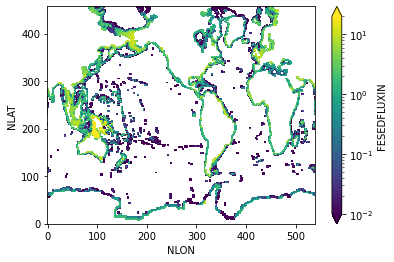

In [8]:
ds_dst.FESEDFLUXIN.sum('DEPTH').plot(norm=colors.LogNorm(vmin=1e-2, vmax=20.))

In [9]:
ds_dst.attrs['note'] = f'temporary forcing file remapped from: {fesedflux_file}'
datestamp = date.today().strftime("%y%m%d")
path = f'{util.dirout}/fesedflux_total_reduce_oxic_{dst_grid.grid_name}.c{datestamp}.nc'


util.to_netcdf_clean(ds_dst, path, format='netcdf4')
util.ncks_fl_fmt64bit(path)

------------------------------
Writing /glade/work/mclong/cesm_inputdata/fesedflux_total_reduce_oxic_tx0.66v1.c201204.nc
xarray.Dataset {
dimensions:
	DEPTH = 112 ;
	NLAT = 458 ;
	NLON = 540 ;

variables:
	float64 DEPTH(DEPTH) ;
	float64 LAT(NLAT, NLON) ;
		LAT:long_name = latitude ;
		LAT:units = degrees_north ;
		LAT:standard_name = latitude ;
	float64 LON(NLAT, NLON) ;
		LON:long_name = longitude ;
		LON:units = degrees_east ;
		LON:modulo = 360.0 ;
		LON:standard_name = longitude ;
	float64 FESEDFLUXIN(DEPTH, NLAT, NLON) ;
		FESEDFLUXIN:units = micromol/m^2/d ;
		FESEDFLUXIN:long_name = Fe sediment flux (total) ;
	float64 FESEDFLUXIN_oxic(DEPTH, NLAT, NLON) ;
		FESEDFLUXIN_oxic:units = micromol m$^{-2}$ d$^{-1}$ ;
		FESEDFLUXIN_oxic:long_name = Fe sediment flux (oxic) ;
	float64 FESEDFLUXIN_reduce(DEPTH, NLAT, NLON) ;
		FESEDFLUXIN_reduce:units = micromol m$^{-2}$ d$^{-1}$ ;

// global attributes:
	:note = temporary forcing file remapped from: /glade/work/mclong/cesm_inputdata/fese

In [10]:
feventflux_file = f'{util.inputdata}/ocn/pop/gx1v7/forcing/feventflux_gx1v6_5gmol_cesm1_97_2017.nc'
ds_src_vent = xr.open_dataset(feventflux_file).rename(
    x='nlon',
    y='nlat',
    z='z_t',
)
ds_src_vent = xr.merge((ds_src_vent, pop_tools.get_grid('POP_gx1v7')[['z_t',]]))

ds_src_vent.FESEDFLUXIN.attrs['units'] = 'micromol/m^2/d'
ds_src_vent.FESEDFLUXIN.attrs['long_name'] = 'Fe geothermal vent flux'

ds_src_vent.info()

/glade/work/mclong/miniconda3/envs/forcing-Fe-sedflux/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	z_t = 60 ;

variables:
	float64 z_t(z_t) ;
	float32 FESEDFLUXIN(z_t, nlat, nlon) ;
		FESEDFLUXIN:units = micromol/m^2/d ;
		FESEDFLUXIN:long_name = Fe geothermal vent flux ;

// global attributes:
}

In [11]:
ds_dst_vent_xy = regridder.regrid(ds_src_vent, renormalize=True, apply_mask=True)
ds_dst_vent_xy

<xarray.Dataset>
Dimensions:      (nlat: 458, nlon: 540, z_t: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    FESEDFLUXIN  (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan

In [12]:
ds_dst_vent = regrid_vertical(ds_dst_vent_xy)
ds_dst_vent

<xarray.Dataset>
Dimensions:      (DEPTH: 112, NLAT: 458, NLON: 540)
Coordinates:
  * DEPTH        (DEPTH) float64 0.0 5.0 10.0 15.0 ... 6.3e+03 6.4e+03 6.5e+03
    LAT          (NLAT, NLON) float64 -79.2 -79.2 -79.2 ... 50.27 50.11 49.99
    LON          (NLAT, NLON) float64 -286.7 -286.0 -285.3 ... 72.97 72.98 73.0
Dimensions without coordinates: NLAT, NLON
Data variables:
    FESEDFLUXIN  (DEPTH, NLAT, NLON) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [13]:
ds_dst_vent.attrs['note'] = f'temporary forcing file remapped from: {feventflux_file}'
datestamp = date.today().strftime("%y%m%d")
path = f'{util.dirout}/feventflux_5gmol_{dst_grid.grid_name}.c{datestamp}.nc'
util.to_netcdf_clean(ds_dst_vent, path, format='netcdf4')
util.ncks_fl_fmt64bit(path)

------------------------------
Writing /glade/work/mclong/cesm_inputdata/feventflux_5gmol_tx0.66v1.c201204.nc
xarray.Dataset {
dimensions:
	DEPTH = 112 ;
	NLAT = 458 ;
	NLON = 540 ;

variables:
	float64 DEPTH(DEPTH) ;
	float64 LAT(NLAT, NLON) ;
		LAT:long_name = latitude ;
		LAT:units = degrees_north ;
		LAT:standard_name = latitude ;
	float64 LON(NLAT, NLON) ;
		LON:long_name = longitude ;
		LON:units = degrees_east ;
		LON:modulo = 360.0 ;
		LON:standard_name = longitude ;
	float64 FESEDFLUXIN(DEPTH, NLAT, NLON) ;
		FESEDFLUXIN:units = micromol/m^2/d ;
		FESEDFLUXIN:long_name = Fe geothermal vent flux ;

// global attributes:
	:note = temporary forcing file remapped from: /glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v7/forcing/feventflux_gx1v6_5gmol_cesm1_97_2017.nc ;
	:history = created by https://github.com/marbl-ecosys/forcing-Fe-sedflux/tree/df6d787 on 2020-12-04 ;
}
